
<p align="center"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p><h1><font color='0B5345'> <center>

Informática II

 </center></font></h1>
<h2><font color='0B5345'> <center>
Parcial II: Computación numérica en python</center></font></h2>
<font  face="Courier New" size="3">

<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia - Bioingeniería</font></b> </center></p3>




Nombre: **Randy Garcia Perez**

Cédula: **1043651425**


Antes de iniciar leer cuidadosamente cada enunciado antes de responder y asegurarse de comprender completamente lo que se está solicitando. 

¡Buena suerte!

1. (50%) La electromiografía (EMG) es una técnica ampliamente utilizada en medicina y fisiología para estudiar la actividad eléctrica de los músculos. Esta actividad, conocida como electromiograma (EMG), se registra mediante electrodos colocados sobre la piel o dentro del músculo, y proporciona información valiosa sobre el funcionamiento del sistema neuromuscular.

Instrucciones:

Utilizando programación orientada a objetos, cargue dos archivos de señales de EMG que contenga datos de varios electrodos (canales).

-LISTO Cree un método que muestre la información de la señal, que describa la forma de la señal y sus dimensiones (ejemplo: número de puntos de tiempo y el número de canales)

- LISTO Defina un método que sea capaz de graficar cada par de canales de EMG en un subplot con un tamaño adecuado. El número de canales es par, por lo tanto debe organizar los subplots en una matriz de dimensiones (numerodecanales/2, numerodecanales/2). Cada canal debe tener un color distinto en el gráfico.

- LISTO Los gráficos deben tener títulos, labels, cuadrícula, nombres en los ejes y cambios en el grosor de la línea.
- LISTO Debe permitir al usuario ingresar los límites del eje x a graficar.
- LISTO En este caso el gráfico es datos vs tiempo

- LISTO Defina un método que identifique y muestre la información del valor máximo de amplitud de la señal por cada canal y archivo.

- Cree un método adicional que grafique una señal que represente el promedio de todos los canales de un archivo. Esta señal promedio debe tener un estilo de línea diferente y estar en un gráfico separado.

2. (20%) Utilice la librería NumPy para generar una serie de señales sinusoidales con las siguientes características:

- **Frecuencia de la señal: 1 Hz.**
- **Número de muestras: 1000.**
- **Rango de amplitud: entre 1 y 5 unidades.**

Genere un total de 5 señales sinusoidales, cada una con una amplitud aleatoria dentro del rango especificado.

Utilice la librería Matplotlib para graficar las 5 señales sinusoidales en una misma figura y cada señal debe estar etiquetada con su respectiva amplitud en la leyenda.

Incluya etiquetas adecuadas en los ejes x e y de la figura, así como un título descriptivo.

3. (30%) Cargue el conjunto de datos de dispositivos médicos desde el archivo CSV 'datos_dispositivos.csv' utilizando la biblioteca Pandas.
Realice un análisis exploratorio de los datos utilizando métodos y funciones de Pandas: 

- Muestre las primeras filas del DataFrame para entender su estructura.
- Verifique la información básica del DataFrame, como el número de filas y columnas, los tipos de datos de cada columna y la presencia de valores nulos.
- Filtre el dataframe según la clasificación de riesgo de los dispositivos y cree un nuevo dataframe para cada uno de ellos.
- Por medio de filtros y métodos de pandas identifique los diferentes fabricantes de los dispositivos de la bases de datos y cuantos dispositivos corresponden a cada uno de los fabricantes.

**Éxitos y recuerden que la entrega del parcial se realiza subiendo este notebook a su repositorio de github.**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as sio 


In [323]:
#Punto - 1

class LectorEMG:

    def __init__(self,archivo1,archivo2):

        self.archivo1 = archivo1
        self.archivo2 = archivo2
        self.info1 = sio.loadmat(self.archivo1)
        self.info2 = sio.loadmat(self.archivo2)

#Cree un método que muestre la información de la señal, que describa la forma de 
#la señal y sus dimensiones (ejemplo: número de puntos de tiempo y el número de canales)
    def infoSeñal(self):

        self.canales1 = self.info1[list(self.info1.keys())[3:][1]].shape[0]
        self.canales2 = self.info2[list(self.info2.keys())[3:][1]].shape[0]

        print(f""" 
                    El archivo 1 y 2 cargado es del tipo: {type(self.info1)}, {type(self.info2)} respectivamente.
               
                    Las llaves del archivo 1 y 2 son: {self.info1.keys()}, {self.info2.keys()} respectivamente.

                    Las llaves con informacion de los dos archivos son: {list(self.info1.keys())[3:]}

                    Los archivos 1 y 2 tienen: {self.info1[list(self.info1.keys())[3:][1]].shape[0]}, {self.info2[list(self.info2.keys())[3:][1]].shape[0]} canales respectivamente.

                    Los archivos 1 y 2 tienen: {self.info1[list(self.info1.keys())[3:][0]].shape[1]}, {self.info2[list(self.info2.keys())[3:][0]].shape[1]} puntos de tiempo respectivamente.
                    
                    Los archivos 1 y 2 tienen: {self.info1[list(self.info1.keys())[3:][1]].shape[1]}, {self.info2[list(self.info2.keys())[3:][0]].shape[1]} puntos de muestras respectivamente.

                    La informacion del archivo 1 de los datos y el tiempo son:

                                {self.info1[list(self.info1.keys())[3:][1]]}, {self.info1[list(self.info1.keys())[3:][0]]} respectivamente.

                    La informacion del archivo 2 de los datos y el tiempo son:

                                {self.info2[list(self.info2.keys())[3:][1]]}, {self.info2[list(self.info2.keys())[3:][0]]} respectivamente. 
                    
                        """) 
        
    def graficarCanal(self,limite_ejex=None):

        datos = self.info1[list(self.info1.keys())[3:][1]]
        datos2 = self.info2[list(self.info2.keys())[3:][1]]
        tiempo = self.info1[list(self.info1.keys())[3:][0]]
        tiempo2 = self.info2[list(self.info2.keys())[3:][0]]
        dimension_matriz = self.info1[list(self.info1.keys())[3:][1]].shape[0] / 2
        dimension_matriz = int(dimension_matriz)
         


        fig, ((a1,a2,a3,a4),(a5,a6,a7,a8),(a9,a10,a11,a12),(a13,a14,a15,a16)) = plt.subplots(dimension_matriz,dimension_matriz, figsize=(18, 14), sharex=True)

        a1.plot(tiempo[0,0:limite_ejex],datos[0,:],'r', label = 'Canal 1', color = 'Brown', linewidth = 2)
        a1.set_xlabel("Tiempo") 
        a1.set_ylabel("Señal 1") 
        a1.set_title("Señal VS Tiempo")
        a1.legend()
        a1.grid(True)

        a2.plot(tiempo2[0,0:limite_ejex],datos2[0,:],'r', label = 'Canal 1', color = 'Gray')
        a2.set_xlabel("Tiempo") 
        a2.set_ylabel("Señal 2") 
        a2.set_title("Señal VS Tiempo")
        a2.legend()
        a2.grid(True)

        a3.plot(tiempo[0,0:limite_ejex],datos[1,:],'r', label = 'Canal 2', color = 'Red')
        a3.set_xlabel("Tiempo") 
        a3.set_ylabel("Señal 1") 
        a3.set_title("Señal VS Tiempo")
        a3.legend()
        a3.grid(True)

        a4.plot(tiempo2[0,0:limite_ejex],datos2[1,:],'r', label = 'Canal 2', color = 'Black')
        a4.set_xlabel("Tiempo") 
        a4.set_ylabel("Señal 2") 
        a4.set_title("Señal VS Tiempo")
        a4.legend()
        a4.grid(True)

        a5.plot(tiempo[0,0:limite_ejex],datos[2,:],'r', label = 'Canal 3', color = 'Orange')
        a5.set_xlabel("Tiempo") 
        a5.set_ylabel("Señal 1") 
        a5.set_title("Señal VS Tiempo")
        a5.legend()
        a5.grid(True)

        a6.plot(tiempo2[0,0:limite_ejex],datos2[2,:],'r', label = 'Canal 3', color = 'Yellow')
        a6.set_xlabel("Tiempo") 
        a6.set_ylabel("Señal 2") 
        a6.set_title("Señal VS Tiempo")
        a6.legend()
        a6.grid(True)

        a7.plot(tiempo[0,0:limite_ejex],datos[3,:],'r', label = 'Canal 4', color = 'Green')
        a7.set_xlabel("Tiempo") 
        a7.set_ylabel("Señal 1") 
        a7.set_title("Señal VS Tiempo")
        a7.legend()
        a7.grid(True)

        a8.plot(tiempo2[0,0:limite_ejex],datos2[3,:],'r', label = 'Canal 4', color = 'Pink')
        a8.set_xlabel("Tiempo") 
        a8.set_ylabel("Señal 2") 
        a8.set_title("Señal VS Tiempo")
        a8.legend()
        a8.grid(True)

        a9.plot(tiempo[0,0:limite_ejex],datos[4,:],'r', label = 'Canal 5', color = 'Cyan')
        a9.set_xlabel("Tiempo") 
        a9.set_ylabel("Señal 1") 
        a9.set_title("Señal VS Tiempo")
        a9.legend()
        a9.grid(True)

        a10.plot(tiempo2[0,0:limite_ejex],datos2[4,:],'r', label = 'Canal 5', color = 'Magenta')
        a10.set_xlabel("Tiempo") 
        a10.set_ylabel("Señal 2") 
        a10.set_title("Señal VS Tiempo")
        a10.legend()
        a10.grid(True)

        a11.plot(tiempo[0,0:limite_ejex],datos[5,:],'r', label = 'Canal 6', color = 'Blue')
        a11.set_xlabel("Tiempo") 
        a11.set_ylabel("Señal 1") 
        a11.set_title("Señal VS Tiempo")
        a11.legend()
        a11.grid(True)

        a12.plot(tiempo2[0,0:limite_ejex],datos2[5,:],'r', label = 'Canal 6', color = 'cornflowerblue')
        a12.set_xlabel("Tiempo") 
        a12.set_ylabel("Señal 2") 
        a12.set_title("Señal VS Tiempo")
        a12.legend()
        a12.grid(True)

        a13.plot(tiempo[0,0:limite_ejex],datos[6,:],'r', label = 'Canal 7', color = 'greenyellow')
        a13.set_xlabel("Tiempo") 
        a13.set_ylabel("Señal 1") 
        a13.set_title("Señal VS Tiempo")
        a13.legend()
        a13.grid(True)

        a14.plot(tiempo2[0,0:limite_ejex],datos2[6,:],'r', label = 'Canal 7', color = 'springgreen')
        a14.set_xlabel("Tiempo") 
        a14.set_ylabel("Señal 2") 
        a14.set_title("Señal VS Tiempo")
        a14.legend()
        a14.grid(True)

        a15.plot(tiempo[0,0:limite_ejex],datos[7,:],'r', label = 'Canal 8', color = 'tomato')
        a15.set_xlabel("Tiempo") 
        a15.set_ylabel("Señal 1") 
        a15.set_title("Señal VS Tiempo")
        a15.legend()
        a15.grid(True)

        a16.plot(tiempo2[0,0:limite_ejex],datos2[7,:],'r', label = 'Canal 8', color = 'lightseagreen')
        a16.set_xlabel("Tiempo") 
        a16.set_ylabel("Señal 2") 
        a16.set_title("Señal VS Tiempo")
        a16.legend()
        a16.grid(True)

            
        plt.tight_layout()
        plt.show() 

#Defina un método que identifique y muestre la información del valor máximo de amplitud de la señal por cada canal y archivo.

    def valorMaximo(self):
        datos = self.info1[list(self.info1.keys())[3:][1]]
        datos2 = self.info2[list(self.info2.keys())[3:][1]]
        tiempo = self.info1[list(self.info1.keys())[3:][0]]
        tiempo2 = self.info2[list(self.info2.keys())[3:][0]]
        self.canales1 = self.info1[list(self.info1.keys())[3:][1]].shape[0]

        for z in range(0,self.canales1):
            fig, ax = plt.subplots(figsize=(6,4))
            indice_maximo = np.argmax(datos[z,:])
            valor_maximo = np.max(datos[z,:])
            ax.plot(tiempo[0],datos[z,:])  
            ax.set_title(f'Canal {z+1}')
            ax.set_xlabel('Tiempo')
            ax.set_ylabel('Señal 1')
            ax.annotate(f'Máximo(Archivo 1): {valor_maximo}', 
                        xy=(indice_maximo, valor_maximo), 
                        xytext=(indice_maximo, valor_maximo+0.0010),
                        arrowprops=dict(facecolor='black', shrink=0.05))
            ax.grid(True)
        for ar2 in range(0,self.canales1):
            fig, ax = plt.subplots(figsize=(6,4))
            indice_maximo = np.argmax(datos2[ar2,:])
            valor_maximo = np.max(datos2[ar2,:])
            ax.plot(tiempo2[0],datos2[ar2,:])  
            ax.set_title(f'Canal {ar2+1}')
            ax.set_xlabel('Tiempo')
            ax.set_ylabel('Señal 2')
            ax.annotate(f'Máximo(Archivo 2): {valor_maximo}', 
                        xy=(indice_maximo, valor_maximo), 
                        xytext=(indice_maximo, valor_maximo+0.0010),
                        arrowprops=dict(facecolor='black', shrink=0.05))

            ax.grid(True)

#Cree un método adicional que grafique una señal que represente el promedio de todos los canales de un archivo.
#Esta señal promedio debe tener un estilo de línea diferente y estar en un gráfico separado.
    
    def promedioCanales(self):
        datos = self.info1[list(self.info1.keys())[3:][1]]
        datos2 = self.info2[list(self.info2.keys())[3:][1]]
        self.canales1 = self.info1[list(self.info1.keys())[3:][1]].shape[0]

        lista_de_promedios_archivo1 = []
        lista_de_promedios_archivo2 = []

        for promedio in range(0,self.canales1):
            lista_de_promedios_archivo1.append(np.mean(datos[promedio]))

        pa1=np.array(lista_de_promedios_archivo1)
        ejex = range(1,len(lista_de_promedios_archivo1)+1)

        fig, axis = plt.subplots(figsize = (12,8), )

        axis.plot(ejex,pa1,'r',color='green')
        axis.plot(ejex,pa1,'ok',color='green',label ='Promedios')
        axis.set_ylabel('Promedios canales')
        axis.set_xlabel('Canales')
        axis.grid(True)
        axis.set_title('Grafica de promedios - Archivo 1')
        axis.legend()
        plt.show() 

        for promedio2 in range(0,self.canales1):
            lista_de_promedios_archivo2.append(np.mean(datos2[promedio2]))

        pa2=np.array(lista_de_promedios_archivo2)
        ejex2 = range(1,len(lista_de_promedios_archivo2)+1)

        fig, axis2 = plt.subplots(figsize = (12,8), )

        axis2.plot(ejex2,pa2,'r',color='green')
        axis2.plot(ejex2,pa2,'d',color='red',label ='Promedios')
        axis2.set_ylabel('Promedios canales')
        axis2.set_xlabel('Canales')
        axis2.set_title('Grafica de promedios - Archivo')
        axis2.grid(True)
        axis2.legend()

        plt.show() 



In [ ]:
#DESCOMENTAR PARA HACER LAS PRUEBAS

prueba1 = LectorEMG(r'C:\Users\randy\OneDrive\Documentos\Udea Clases\Tercer Semestre\Informatica 2\Info-2\Parcial 2\archivo1.mat',r'C:\Users\randy\OneDrive\Documentos\Udea Clases\Tercer Semestre\Informatica 2\Info-2\Parcial 2\archivo2.mat')

prueba1.infoSeñal()
prueba1.graficarCanal()
prueba1.valorMaximo()
prueba1.promedioCanales()

2. (20%) Utilice la librería NumPy para generar una serie de señales sinusoidales con las siguientes características:

- **Frecuencia de la señal: 1 Hz.**
- **Número de muestras: 1000.**
- **Rango de amplitud: entre 1 y 5 unidades.**

Genere un total de 5 señales sinusoidales, cada una con una amplitud aleatoria dentro del rango especificado.

Utilice la librería Matplotlib para graficar las 5 señales sinusoidales en una misma figura y cada señal debe estar etiquetada con su respectiva amplitud en la leyenda.

Incluya etiquetas adecuadas en los ejes x e y de la figura, así como un título descriptivo.

C:\Users\randy\AppData\Local\Temp\ipykernel_7880\245457327.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axseno.plot(np.linspace(0,np.random.randint(1,5)*np.pi,1000),np.sin(np.linspace(0,np.random.randint(1,5)*np.pi,1000)),'r',color='red',label=np.random.randint(1,5))
C:\Users\randy\AppData\Local\Temp\ipykernel_7880\245457327.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axseno.plot(np.linspace(0,np.random.randint(1,5)*np.pi,1000),np.sin(np.linspace(0,np.random.randint(1,5)*np.pi,1000)),'r',color='blue',label=np.random.randint(1,5))
C:\Users\randy\AppData\Local\Temp\ipykernel_7880\245457327.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). Th

<function matplotlib.pyplot.show(close=None, block=None)>

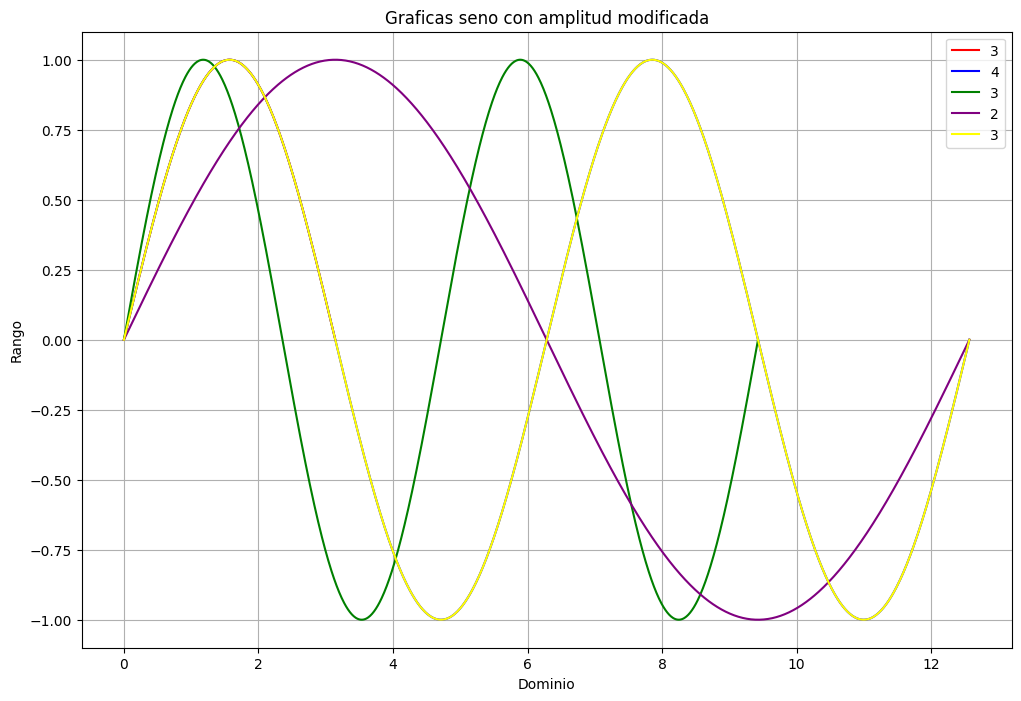

In [322]:
#Parte 2


fig, axseno = plt.subplots ( figsize = (12,8))
axseno.plot(np.linspace(0,np.random.randint(1,5)*np.pi,1000),np.sin(np.linspace(0,np.random.randint(1,5)*np.pi,1000)),'r',color='red',label=np.random.randint(1,5))
axseno.plot(np.linspace(0,np.random.randint(1,5)*np.pi,1000),np.sin(np.linspace(0,np.random.randint(1,5)*np.pi,1000)),'r',color='blue',label=np.random.randint(1,5))
axseno.plot(np.linspace(0,np.random.randint(1,5)*np.pi,1000),np.sin(np.linspace(0,np.random.randint(1,5)*np.pi,1000)),'r',color='green',label=np.random.randint(1,5))
axseno.plot(np.linspace(0,np.random.randint(1,5)*np.pi,1000),np.sin(np.linspace(0,np.random.randint(1,5)*np.pi,1000)),'r',color='purple',label=np.random.randint(1,5))
axseno.plot(np.linspace(0,np.random.randint(1,5)*np.pi,1000),np.sin(np.linspace(0,np.random.randint(1,5)*np.pi,1000)),'r',color='yellow',label=np.random.randint(1,5))
axseno.legend()
axseno.grid()
axseno.set_xlabel('Dominio')
axseno.set_ylabel('Rango')
axseno.set_title('Graficas seno con amplitud modificada')

plt.show






In [210]:
#Parte - 3

datos_dispositivos = pd.read_csv(r"datos_dispositivos.csv",sep=',')
#print(datos_dispositivos)
print(80*'_')
#Se muestran las primeras filas de DataFrame

print(datos_dispositivos.loc[range(0,10)])

print(80*'_')
#Se muestran datos basicos número de filas y columnas, los tipos de datos de cada columna y la presencia de valores nulos.

print(f' En el DataFrame hay {len(datos_dispositivos.index)} filas y {len(datos_dispositivos.columns)} columnas ')
  

for i in datos_dispositivos.columns:

    print(f"""  
                Nombre de la columna: {i}

                Tipo de dato: {datos_dispositivos[i].dtype}

                Numeros de NaN en las columnas: {30 - datos_dispositivos[i].count()}
                
          """)
print(80*'_')
#Filtre el dataframe según la clasificación de riesgo de los dispositivos y cree un nuevo dataframe para cada uno de ellos.
    
Filtrado_rango_bajo = datos_dispositivos[(datos_dispositivos['Clasificacion_riesgo'] == 'Bajo')]
print(f'Nuevo DataFrame de los datos filtrados por bajo riesgo: \n{Filtrado_rango_bajo}')
print(80*'_')
Filtrado_rango_Alto = datos_dispositivos[(datos_dispositivos['Clasificacion_riesgo'] == 'Alto')]
print(f'Nuevo DataFrame de los datos filtrados por alto riesgo: \n{Filtrado_rango_Alto}')
print(80*'_')
Filtrado_rango_Moderado = datos_dispositivos[(datos_dispositivos['Clasificacion_riesgo'] == 'Moderado')]
print(f'Nuevo DataFrame de los datos filtrados por moderado riesgo: \n{Filtrado_rango_Moderado}')
print(80*'_')
#Por medio de filtros y métodos de pandas identifique los diferentes fabricantes
#de los dispositivos de la bases de datos y cuantos dispositivos corresponden a cada uno de los fabricantes.

Lista_de_fabricantes = []
Lista_numero_dispo = []
for f in range(0,30):
    if datos_dispositivos['Fabricante'][f] not in Lista_de_fabricantes:
        Lista_de_fabricantes.append(datos_dispositivos['Fabricante'][f])

for n in Lista_de_fabricantes:
    dato = datos_dispositivos[(datos_dispositivos['Fabricante'] == n)].shape[0]
    Lista_numero_dispo.append(dato)

for d in range(0,len(Lista_de_fabricantes)):

    print(f""" 
                Nombre del fabricante: {Lista_de_fabricantes[d]}

                Numero de dispositivos correspondientes: {Lista_numero_dispo[d]}       
      
            """)



    

    


________________________________________________________________________________
   ID                  Nombre_dispositivo   Fabricante Clasificacion_riesgo
0   1           Monitor de signos vitales      MedTech                 Bajo
1   2                       Desfibrilador     LifeCare             Moderado
2   3                  Electrocardiograma   CardioTech                 Alto
3   4                          Respirador  RespiraCorp                 Bajo
4   5                   Bomba de infusión     InfuseCo             Moderado
5   6          Monitor de gases en sangre   CardioTech                 Alto
6   7       Bomba de insulina intravenosa   CardioTech                 Alto
7   8           Monitor de ritmo cardíaco   CardioTech                 Bajo
8   9  Monitor de signos vitales neonatal      MedTech                 Bajo
9  10          Monitor de gases en sangre  RespiraCorp                 Bajo
________________________________________________________________________________
 E